In [2]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import math as mth
import random as rd

In [3]:
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers=2):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])  # использование последнего выходного состояния
        return out

In [4]:
model1 = torch.load("model_optimazed4.pth", map_location=torch.device('cpu'))
#model2 = torch.load("sber10m5.pth", map_location=torch.device('cpu'))
model2 = torch.load("model_optimazed3.pth", map_location=torch.device('cpu'))
model3 = torch.load("model_optimazed2.pth", map_location=torch.device('cpu'))
#model4 = torch.load("model_optimazed.pth", map_location=torch.device('cpu'))
model1.eval()
model2.eval()
model3.eval()
#model4.eval()


C:\Users\user\AppData\Local\Temp\ipykernel_25764\112065695.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model1 = torch.load("model_optimazed.pth", map_location=torch.

LSTMModel(
  (lstm): LSTM(1, 300, num_layers=4, batch_first=True)
  (fc): Linear(in_features=300, out_features=1, bias=True)
)

seed 3078


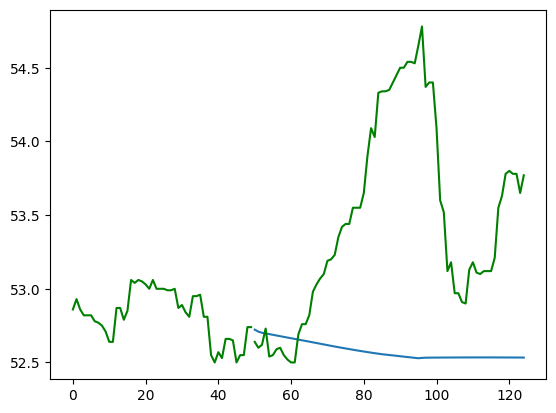

In [69]:
n = 50 #количество входных данных
pred = 75 #длина предсказания

data = pd.read_csv("MOEX_short.txt")
s = rd.randint(0, 18000)
print("seed " + str(s))
x0 = data["open"][s:s+n].tolist()
ans = data["open"][s+n:s+n+pred].tolist()

t = []
x = []
#z = []
#z2 = []
#z3 = []
for i in range(n):
    x.append([x0[i]])
    #z.append([x0[i]])
    #z2.append([x0[i]])
    #z3.append([x0[i]])

for i in range(pred):
    x2 = x[-n:]
    x3 = []
    mx1 = max(x2)[0]
    mn1 = min(x2)[0]

    for i in x2:
        #print(mn1)
        x3.append([(i[0] - mn1) / (mx1 - mn1)])

    x1 = torch.tensor([x3], dtype=torch.float32)
    with torch.no_grad():
        y = model1(x1).numpy()[0][0]
    x.append([y * (mx1 - mn1) + mn1])

# for i in range(pred):
#     x2 = z[-n:]
#     x3 = []
#     mx1 = max(x2)[0]
#     mn1 = min(x2)[0]

#     for i in x2:
#         #print(mn1)
#         x3.append([(i[0] - mn1) / (mx1 - mn1)])

#     x1 = torch.tensor([x3], dtype=torch.float32)
#     with torch.no_grad():
#         y = model2(x1).numpy()[0][0]
#     z.append([y * (mx1 - mn1) + mn1])


# for i in range(pred):
#     x2 = z2[-n:]
#     x3 = []
#     mx1 = max(x2)[0]
#     mn1 = min(x2)[0]

#     for i in x2:
#         #print(mn1)
#         x3.append([(i[0] - mn1) / (mx1 - mn1)])

#     x1 = torch.tensor([x3], dtype=torch.float32)
#     with torch.no_grad():
#         y = model3(x1).numpy()[0][0]
#     z2.append([y * (mx1 - mn1) + mn1])

t = np.arange(len(x))
plt.plot(t[:n],x[:n],c= 'green')
plt.plot(t[n:], x[n:])
plt.plot(t[n:], ans, c='green')
#plt.plot(t[n:], z[n:], c= 'red')
#plt.plot(t[n:], z2[n:], c= 'orange')
#plt.plot(t[n:], z3[n:], c= 'purple')